# ANOGAN - Anomaly Detection with Generative Adversarial Networks 
### Anomaly Detection with Generative Adversarial Networks
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.anogan

### Arguments that work with ANOGAN algorithm:
1. activation_hidden
2. dropout_rate
3. latent_dim_G
4. G_layers
5. verbose
6. D_layers
7. index_D_layer_for_recon_error
8. epochs
9. preprocessing
10. learning_rate
11. learning_rate_query
12. epochs_query
13. batch_size
14. output_activation
15. contamination

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
histograms = O.Features.get_features(imgs, feature_type="hist", norm_type="minmax")

get2D                    ...took   203.083941 seconds


2022-09-01 19:41:38.124146: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 19:41:44.044839: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-09-01 19:41:44.312977: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-09-01 19:41:44.313108: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 19:41:44.330179: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-09-01 19:41:44.330234: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

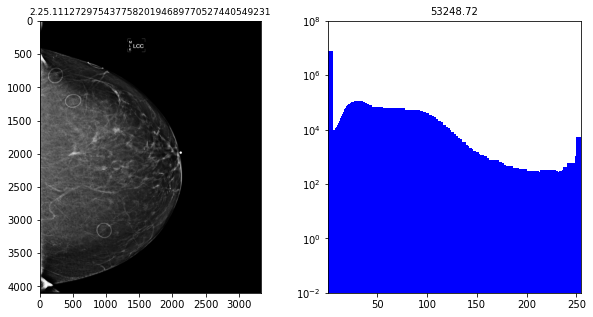

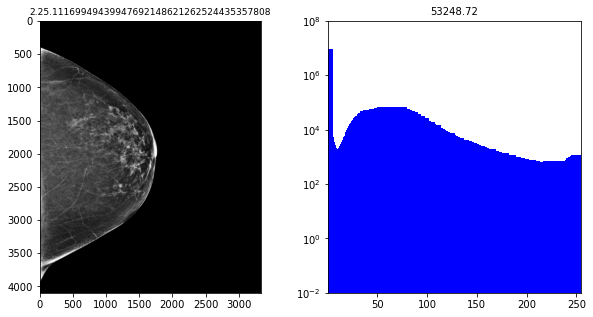

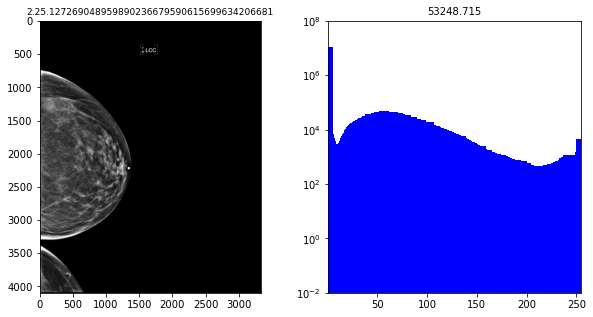

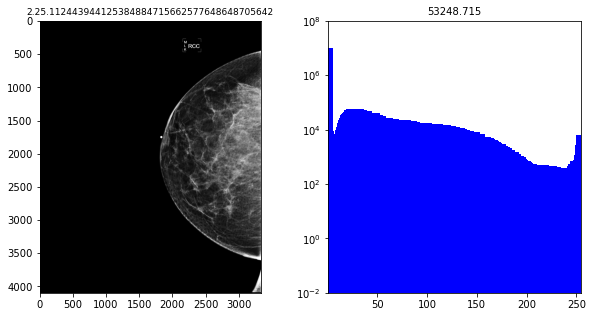

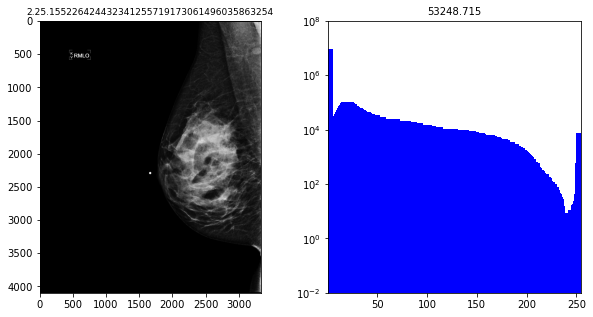

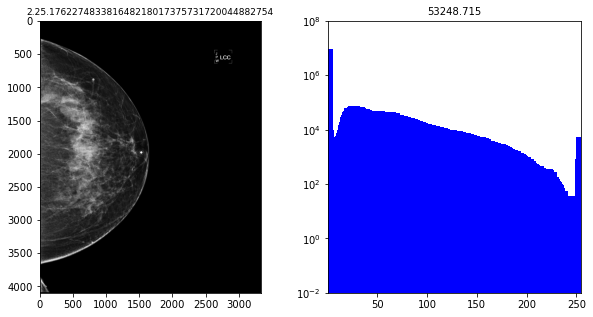

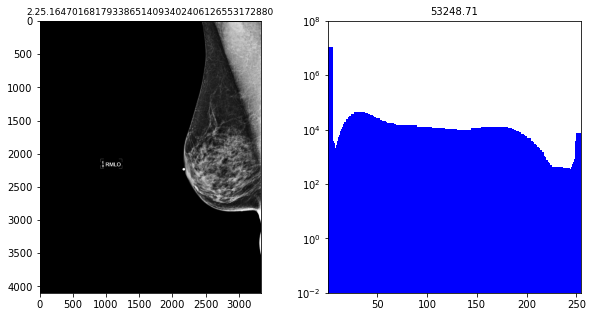

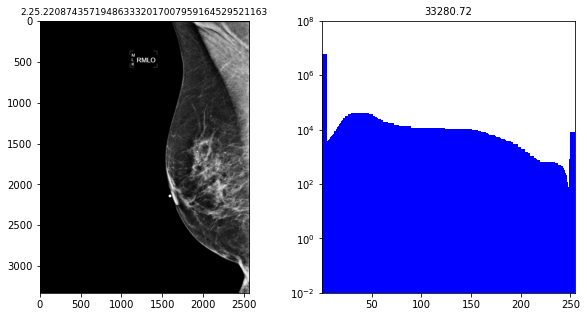

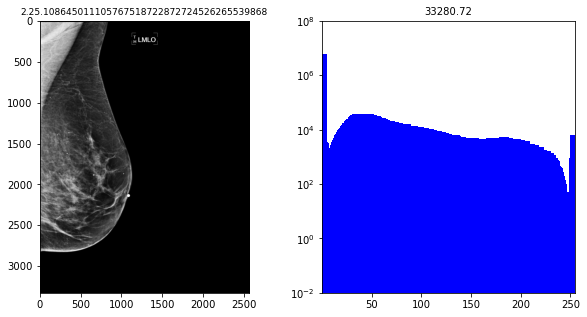

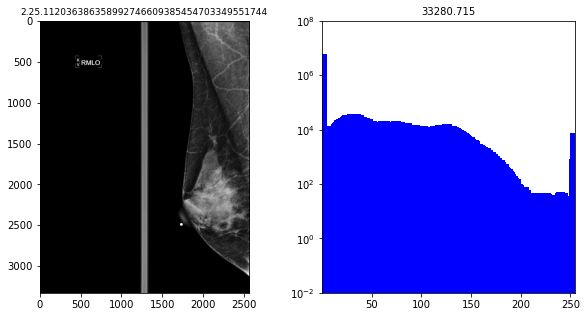

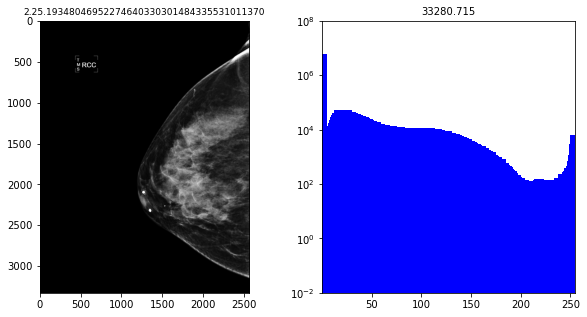

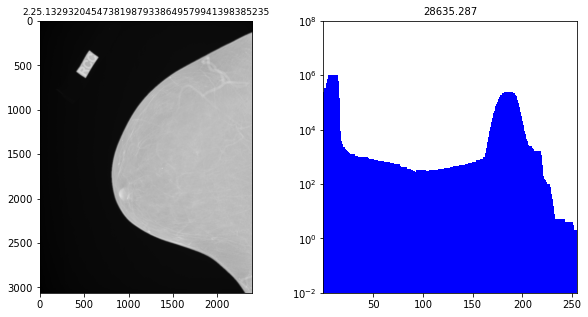

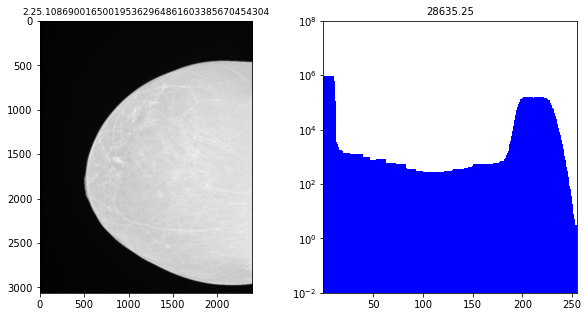

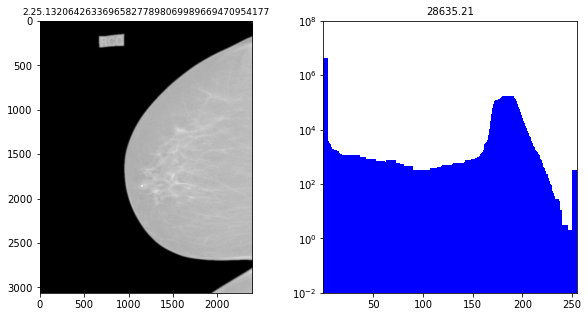

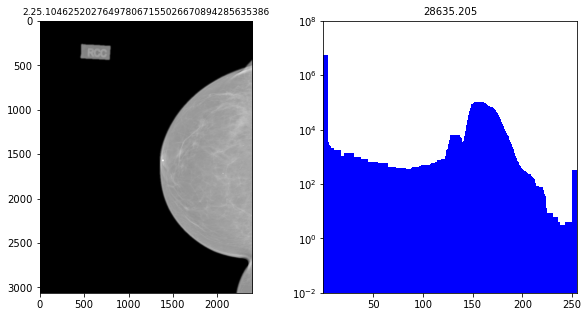

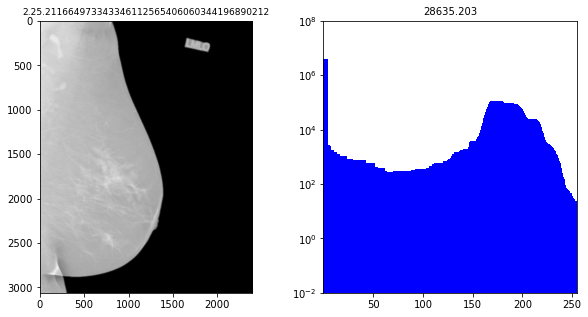

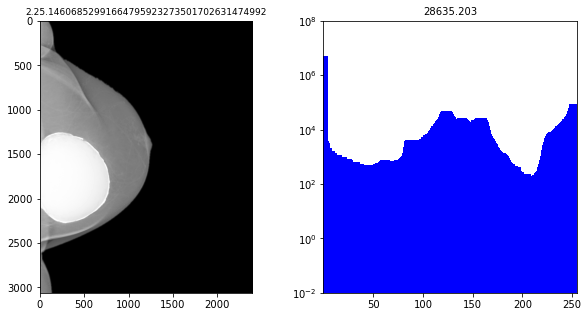

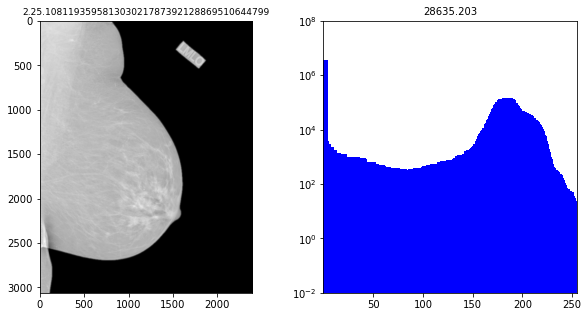

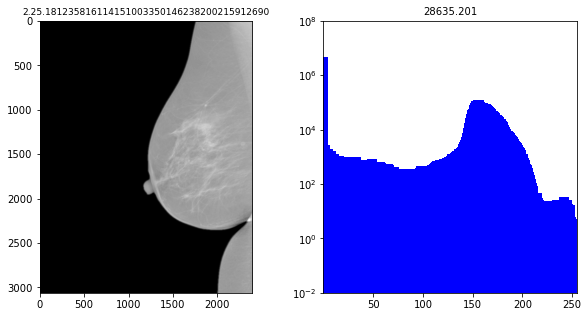

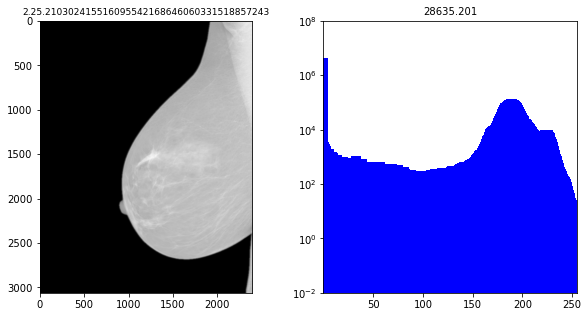

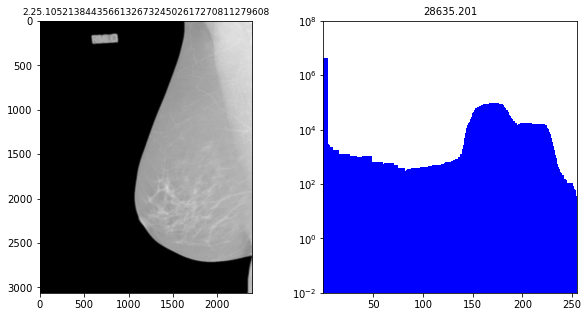

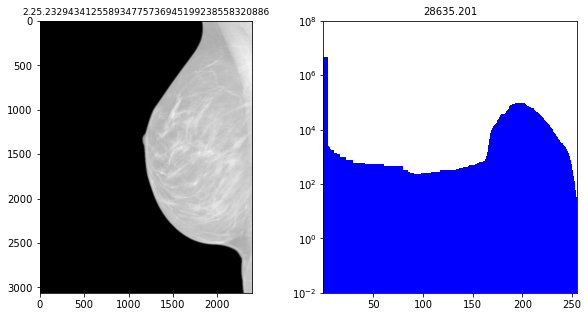

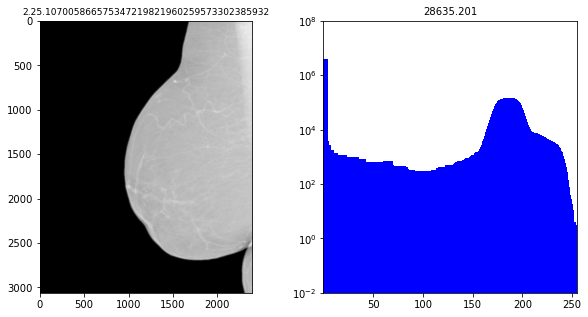

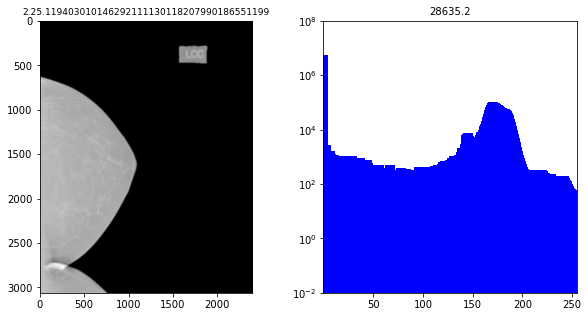

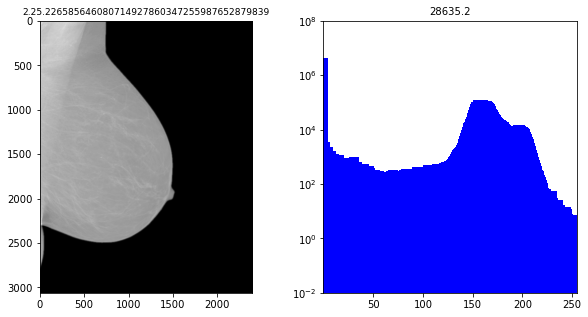

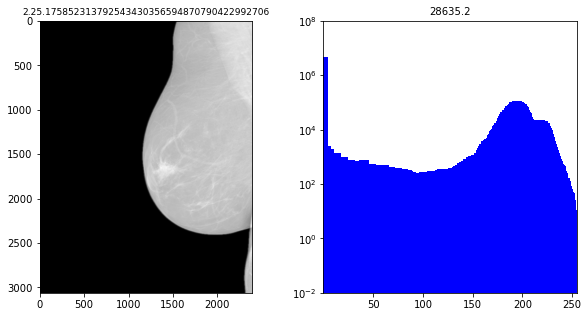

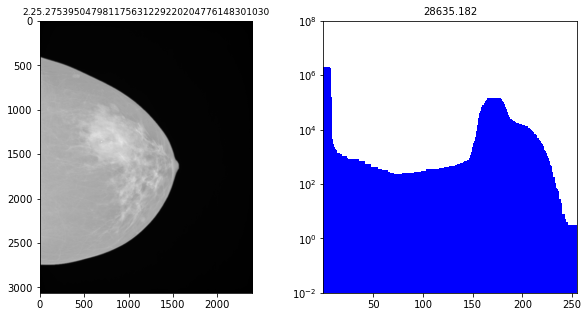

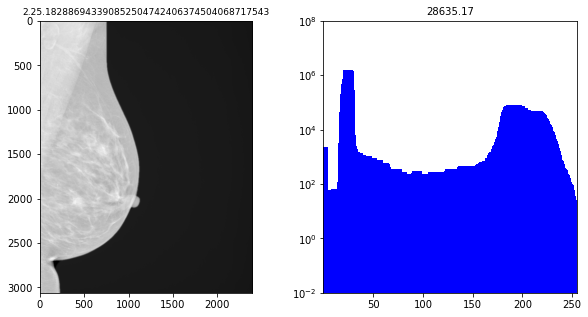

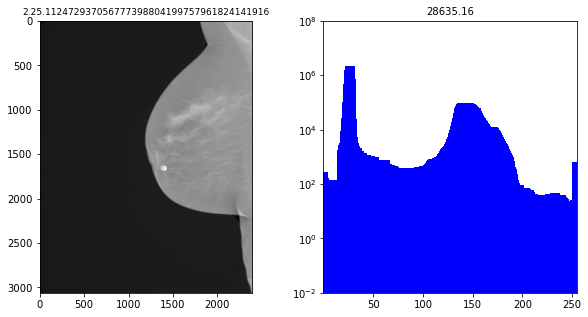

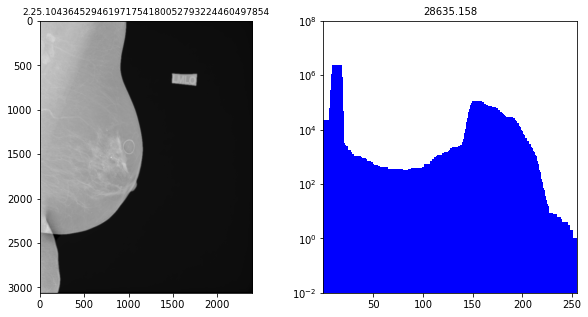

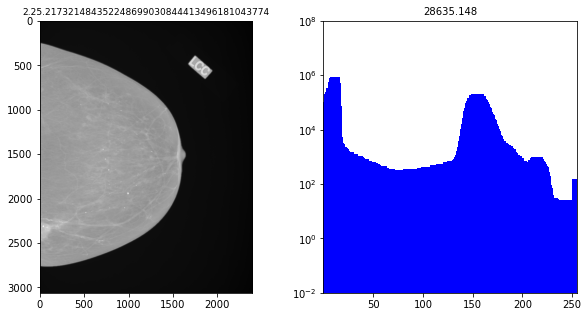

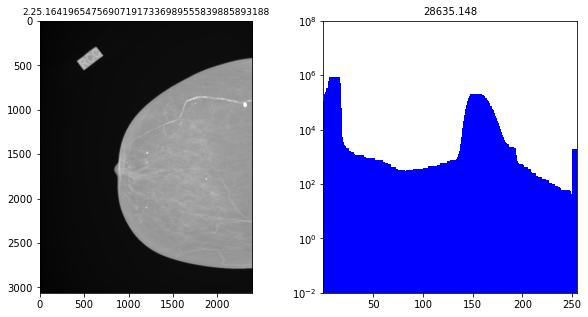

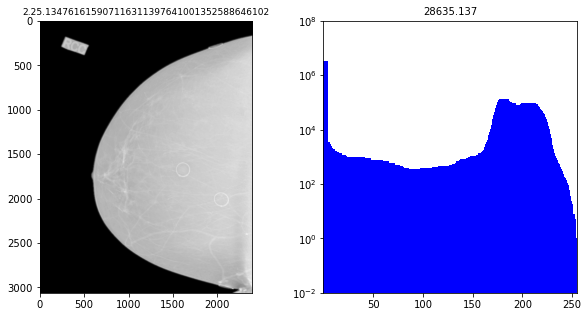

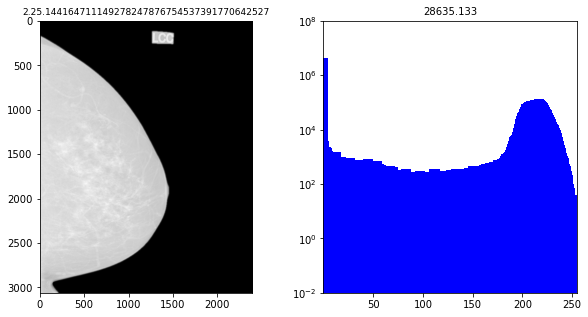

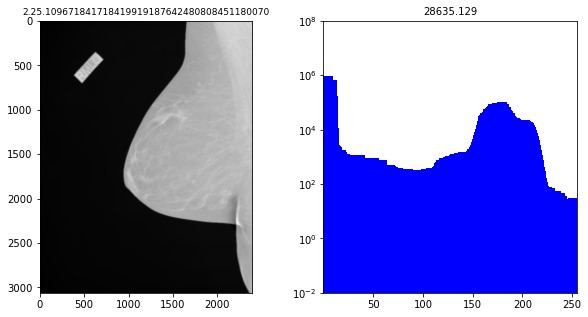

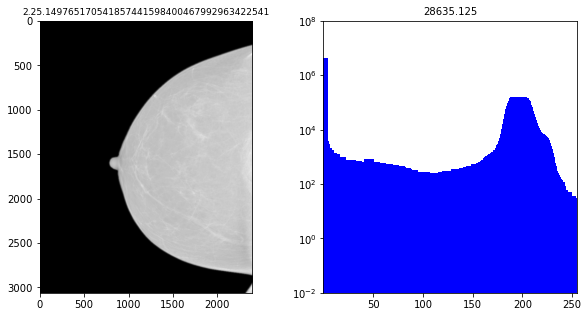

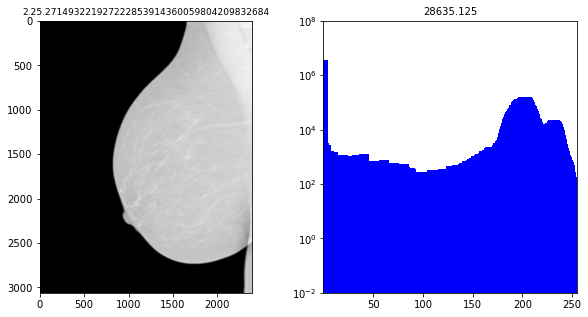

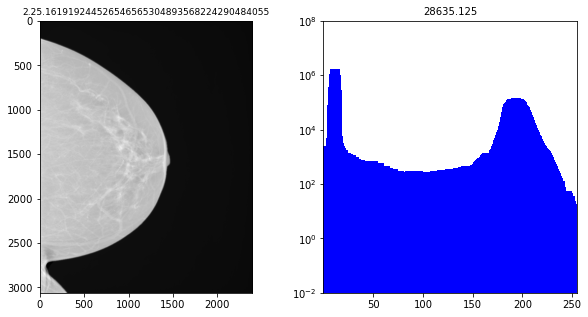

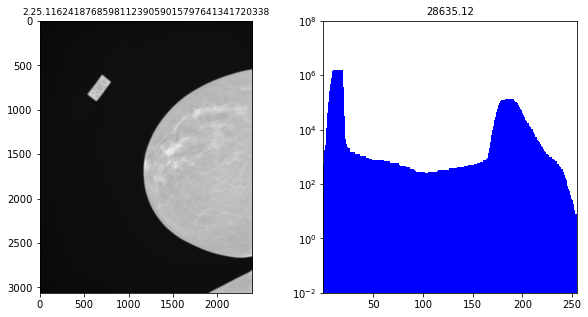

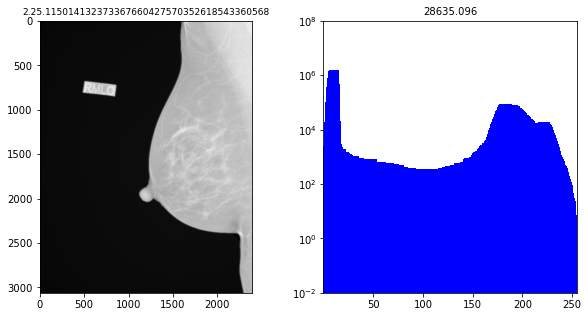

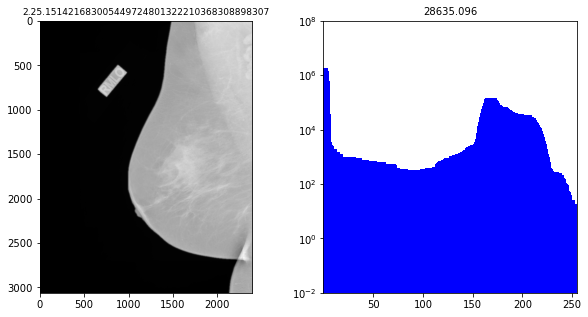

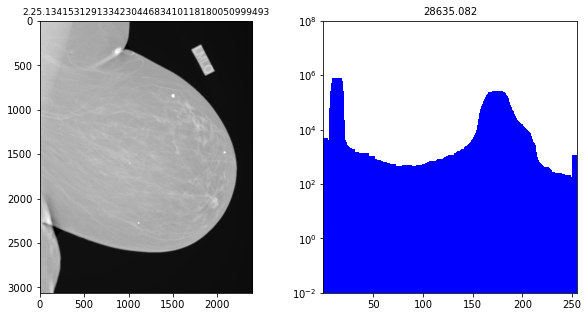

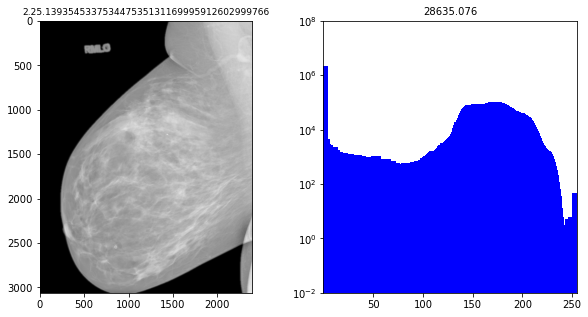

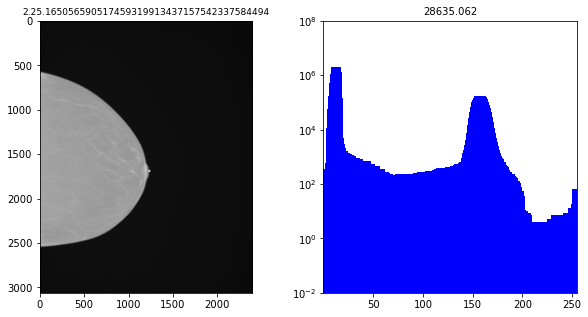

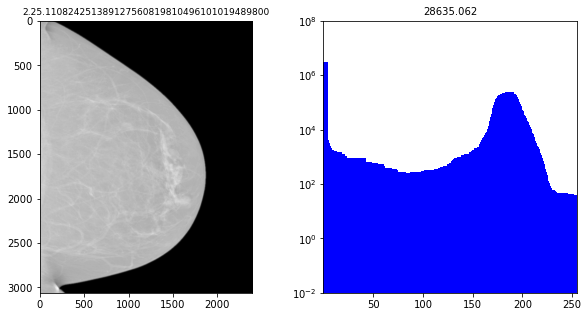

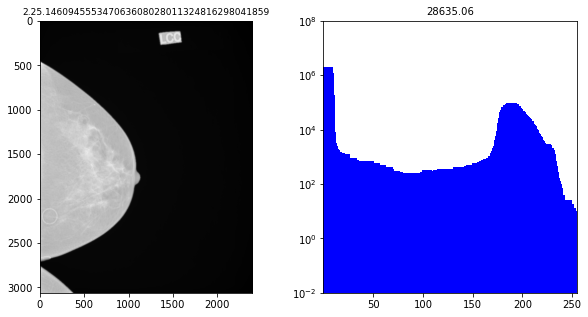

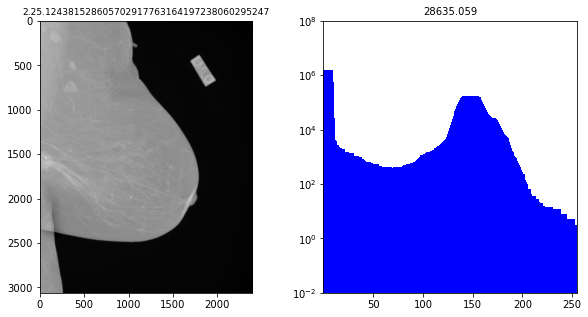

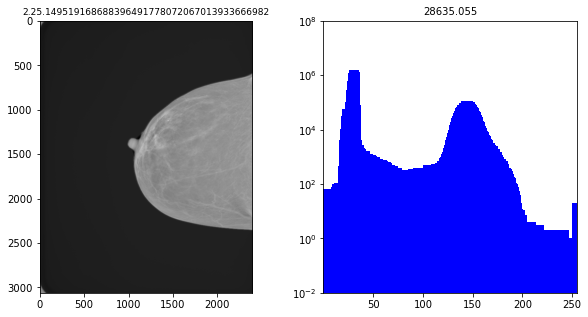

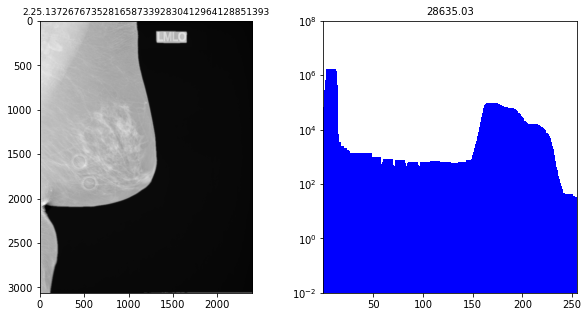

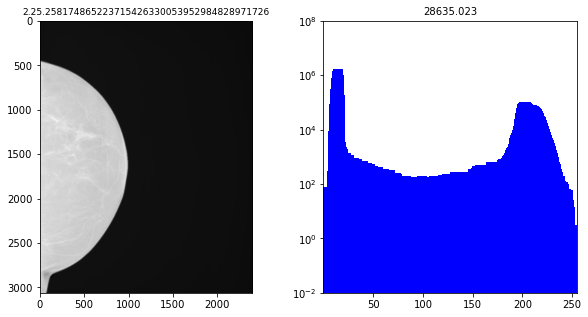

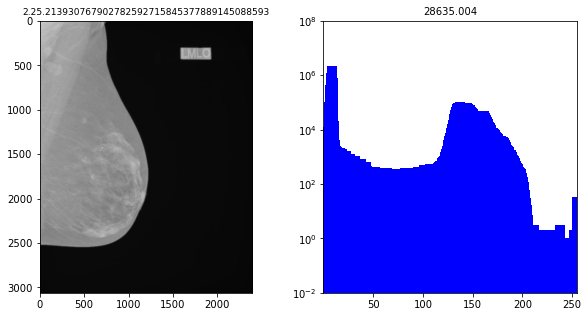

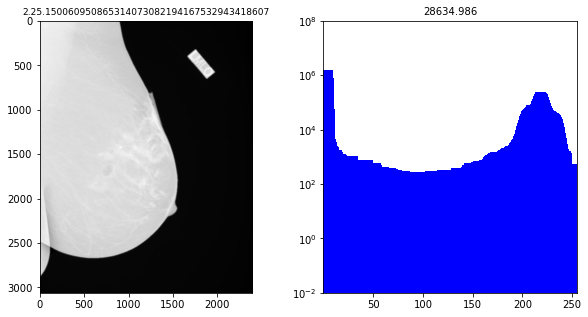

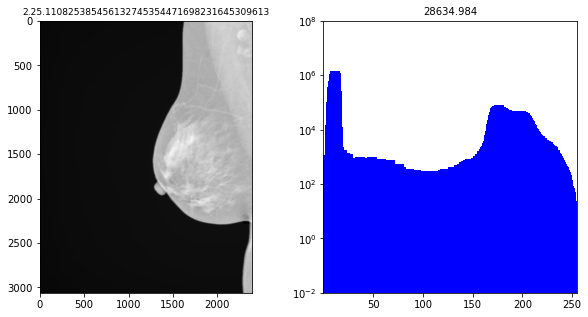

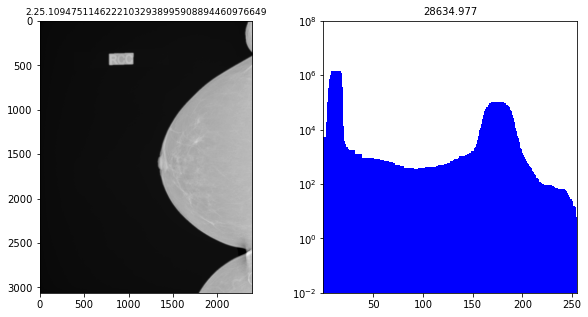

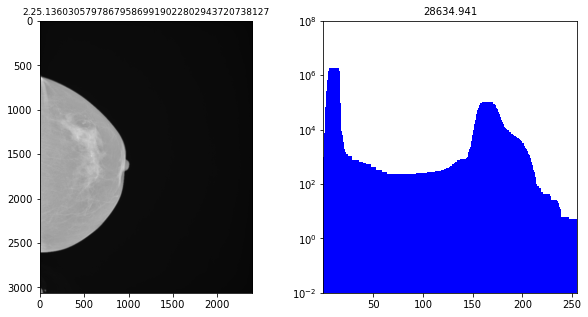

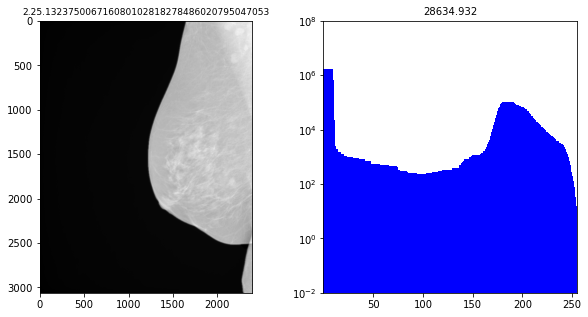

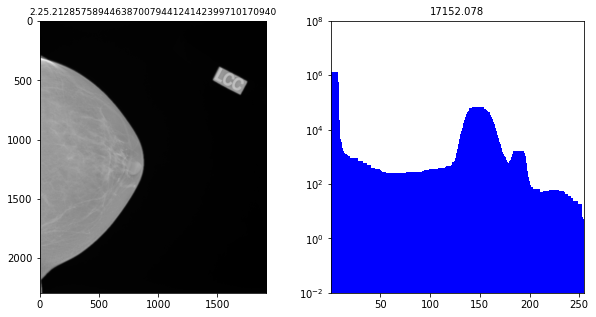

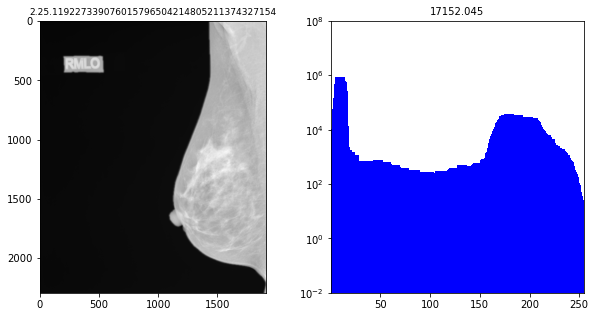

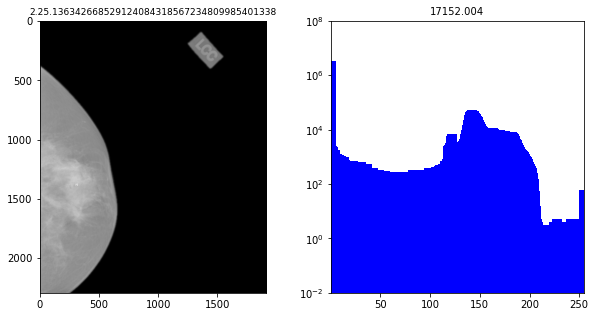

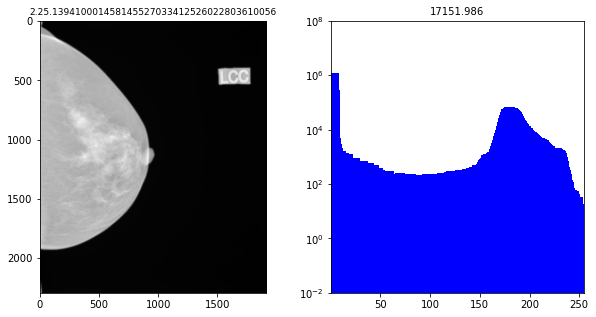

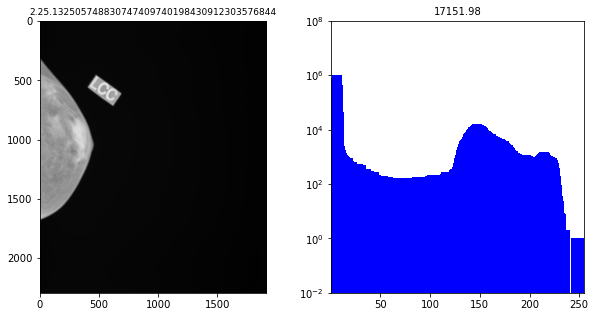

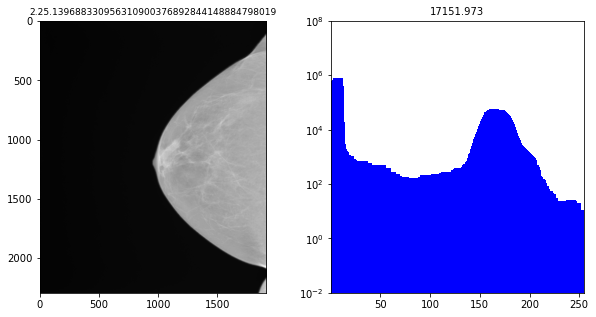

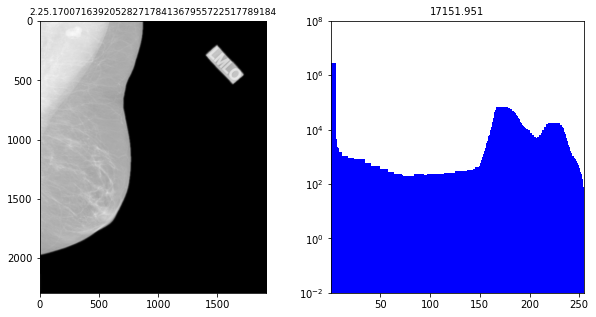

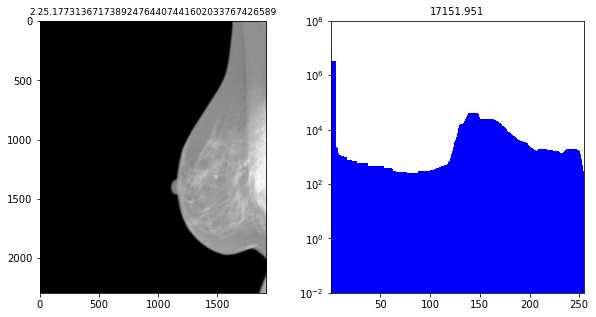

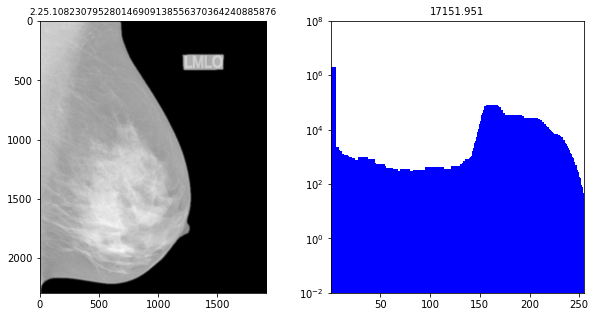

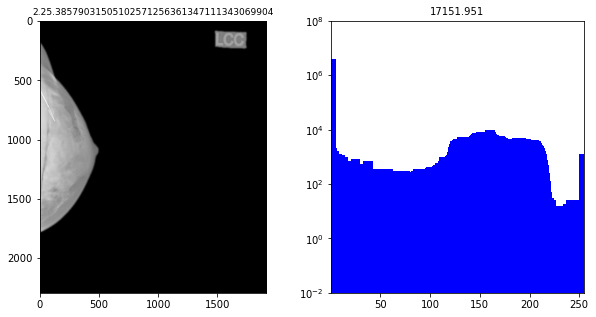

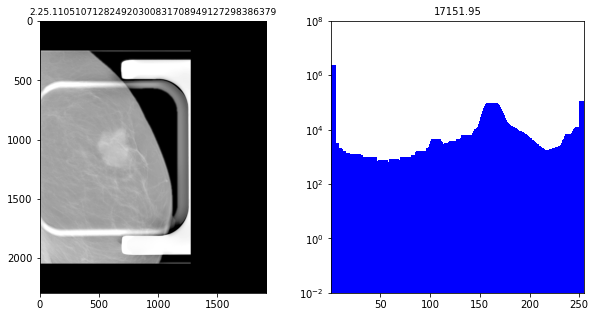

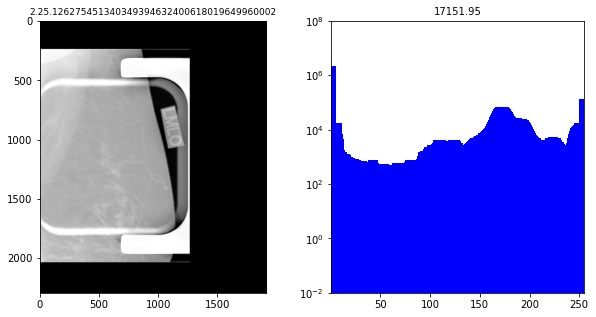

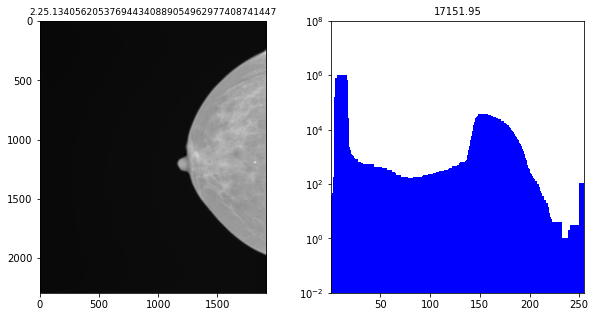

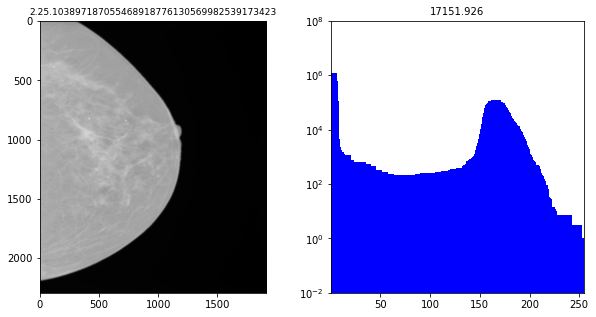

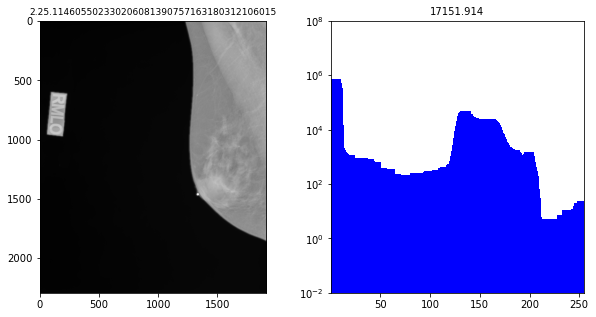

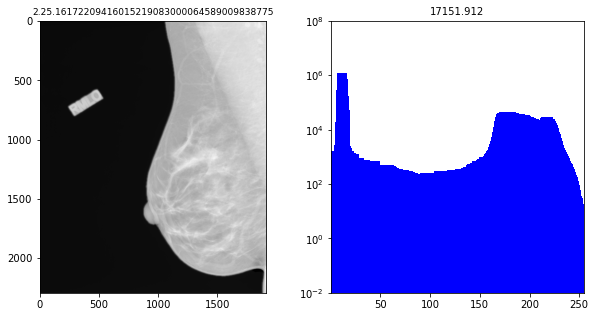

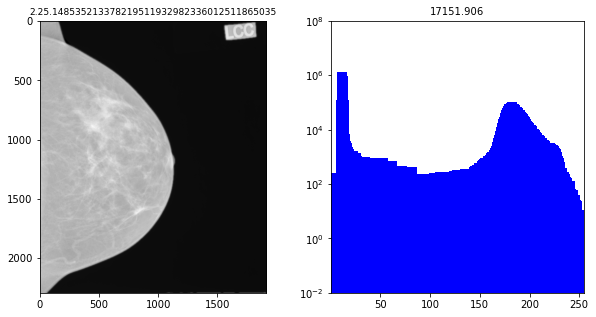

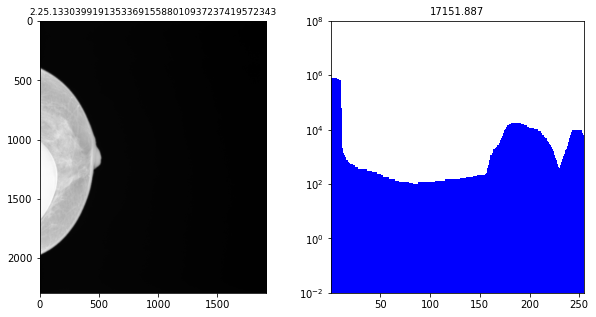

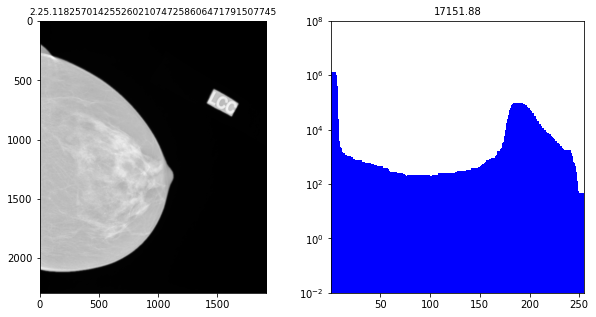

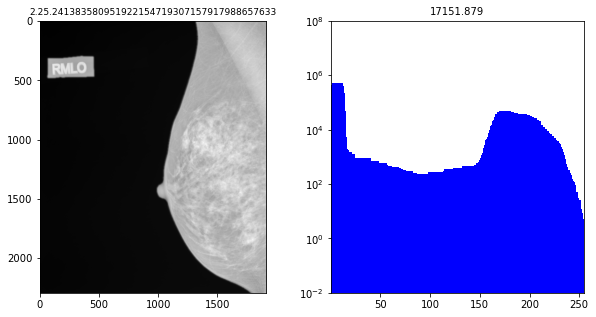

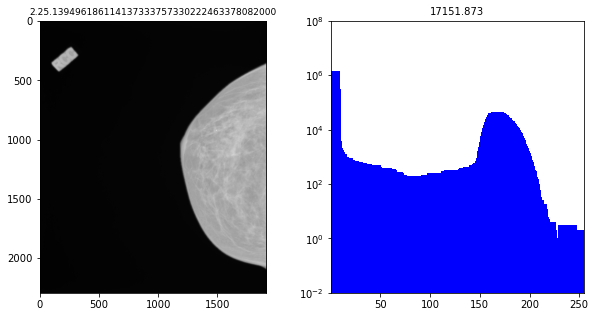

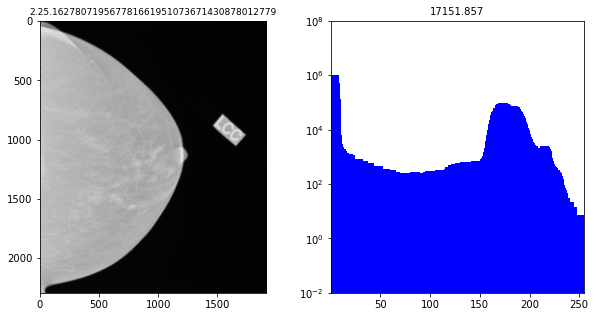

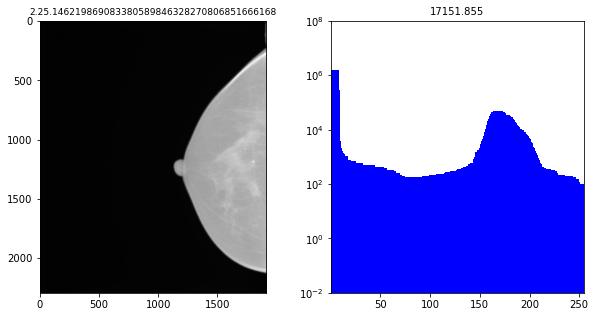

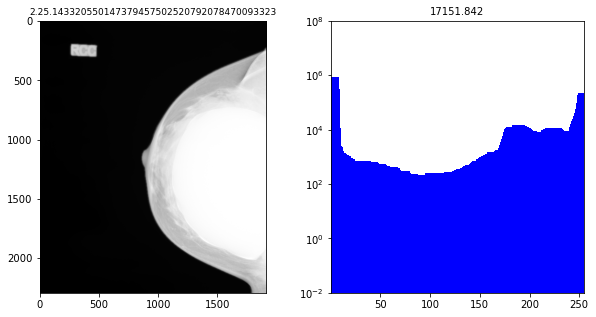

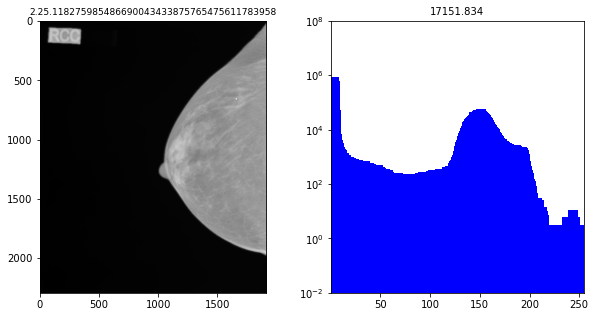

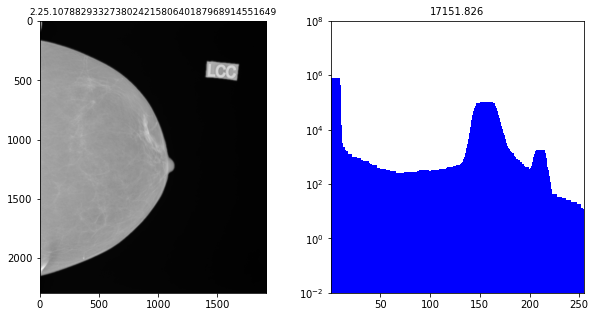

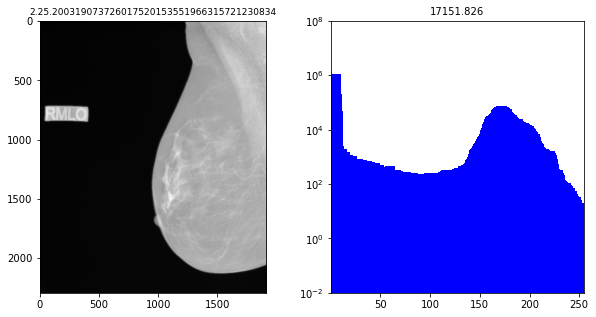

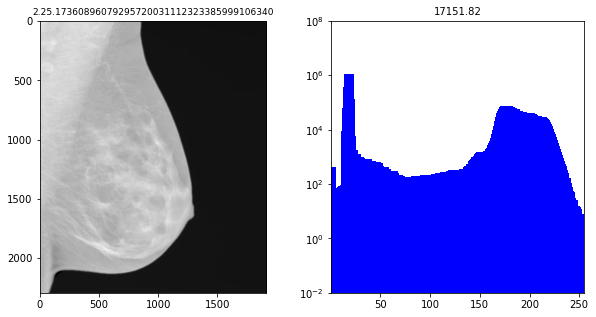

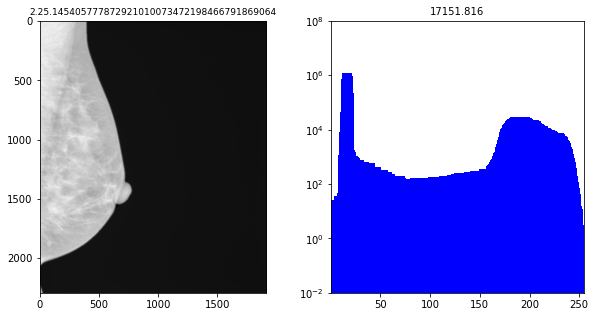

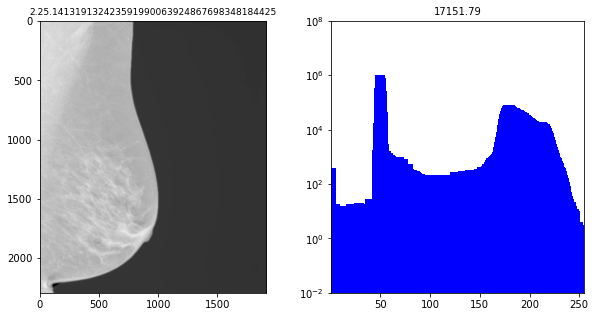

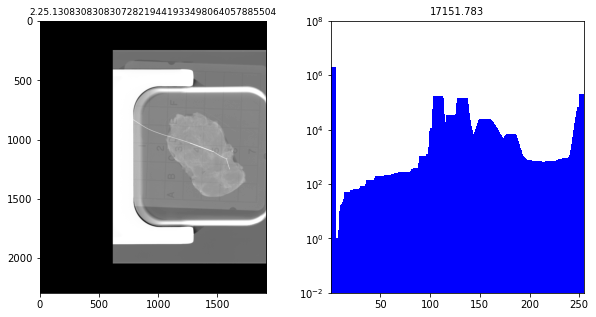

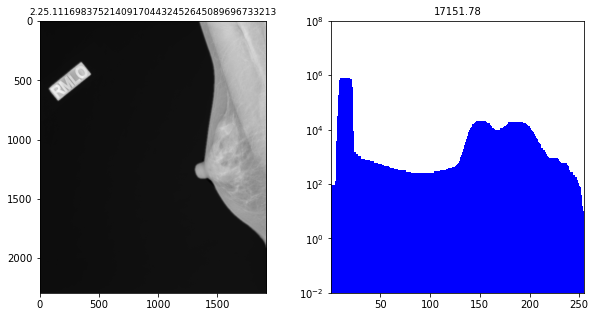

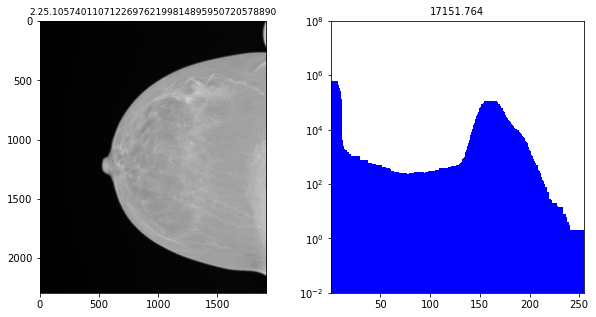

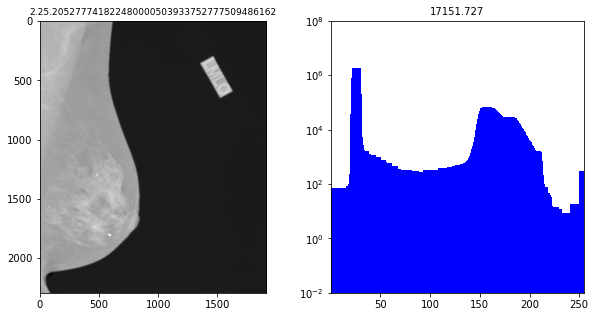

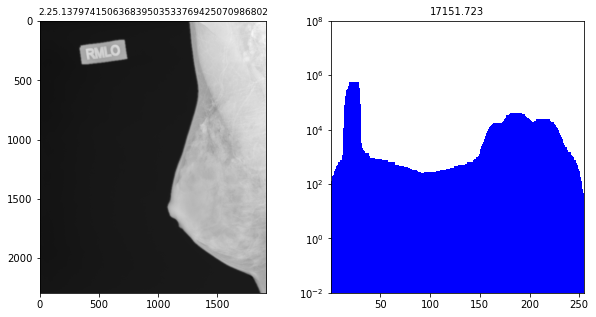

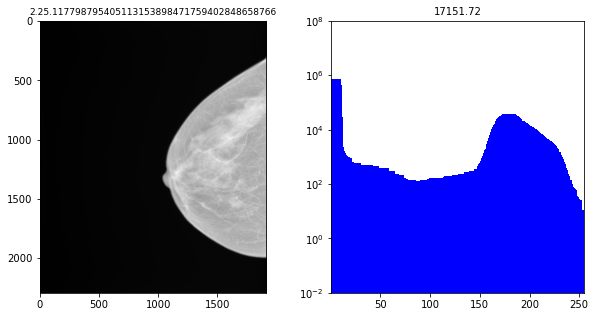

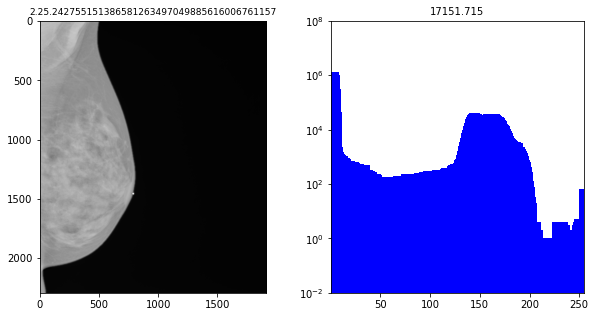

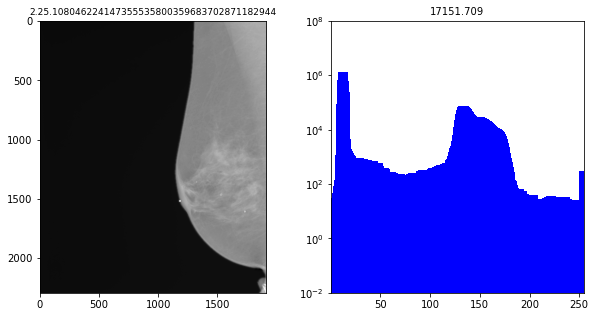

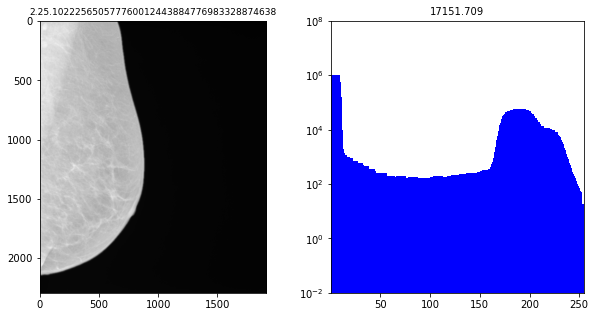

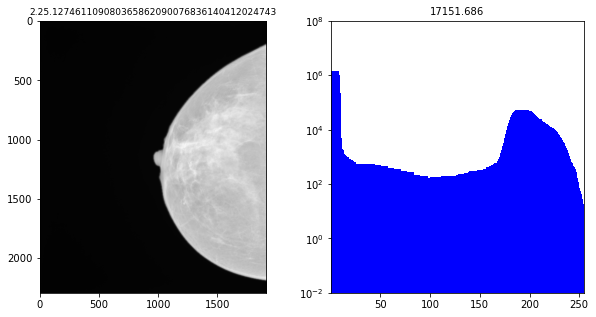

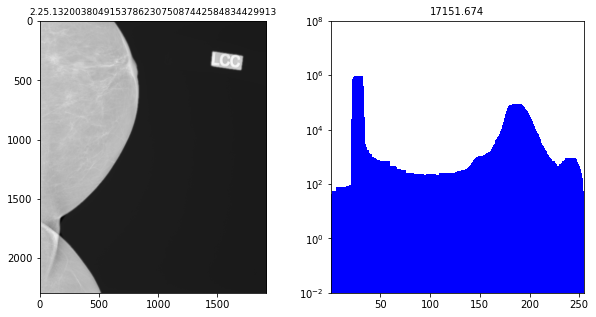

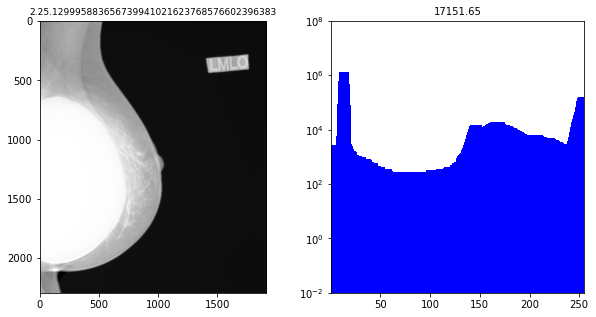

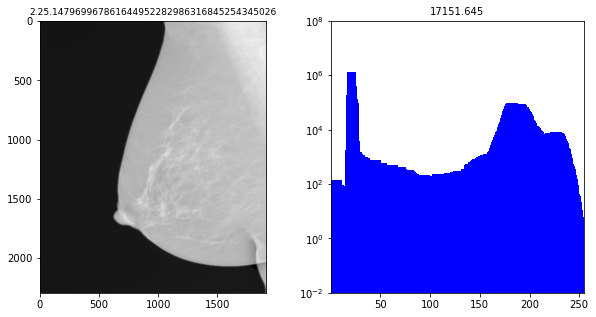

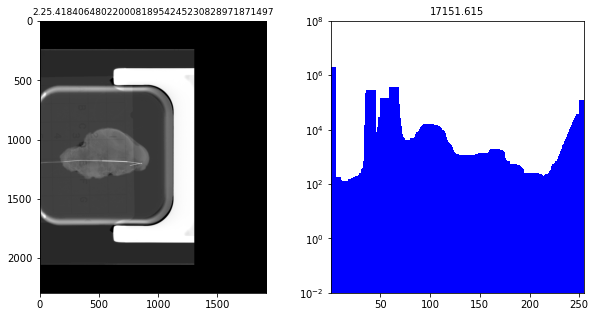

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(histograms, pyod_algorithm='AnoGAN')
O.Features.view_image_and_features(imgs, ['hist'], train_scores=[train_scoresX])